# Dataset
Credit Card Customer Dataset   
Dataset can be found in: https://www.kaggle.com/sakshigoyal7/credit-card-customers

### What is inside the dataset? 

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age:** Demographic variable - Customer's Age in Years
* **Gender:** Demographic variable - M=Male, F=Female
* **Dependent_count:** Demographic variable - Number of dependents
* **Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category:** Demographic variable - Annual Income Category of the account holder (<40K, 40K-60K, 60K-80K, 80K-120K, >120K)

* **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

## Problem Statement

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Essential Libraries

Let us begin by importing the essential Python Libraries.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Machine Learning
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

#Import GridSearch
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Resample to balance classes
from sklearn.utils import resample

# Decision Tree
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

## Import Dataset

In [2]:
o_data = pd.read_csv("BankChurners.csv", header=0)
o_data = o_data.copy().iloc[:,0:-2]
o_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(o_data))
print("Data dims : ", o_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10127, 21)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

It would seem that there are `10127` rows and `21` columns.  

## Clean and transform the data
It seems that **none of the columns have NULL values**, based on previous cells.  
Convert values to numeric values. 

In [5]:
obj_cols = o_data.columns[o_data.dtypes == 'object']
obj_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [6]:
o_data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [7]:
o_data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [8]:
o_data.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [9]:
o_data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [10]:
o_data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [11]:
o_data.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

 sklearn models do not handle categorical variables directly.   
 Convert the categorical values to numerical. 

In [12]:
#Convert the Response to binary, 0 and 1
o_data['Attrition_Flag'] = o_data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1}).astype(int)

#Any other conversion? 
o_data['Income_Category-Unknown'] = o_data['Income_Category'].apply(lambda x: 1 if x == "Unknown" else 0)
o_data['Income_Category'] = o_data['Income_Category'].map({'Unknown':0,
                                                           'Less than $40K':1,
                                                           '$40K - $60K':2,
                                                           '$60K - $80K':3,
                                                           '$80K - $120K':4,
                                                           '$120K +':5}).astype(int)

#categorical data
cat_cols = o_data.columns[o_data.dtypes == 'object']
cat_data = o_data.loc[:,cat_cols]

#numeric data + response
num_cols = o_data.columns[(o_data.dtypes == 'int32')|(o_data.dtypes == 'int64')|(o_data.dtypes == "float64")]
num_data = o_data.loc[:,num_cols]

In [13]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null int32
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null int32
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64

In [14]:
#One Hot Encoding for Categorical Data
ohe = OneHotEncoder()
ohe.fit(cat_data)
ohe_cat_data = pd.DataFrame(ohe.transform(cat_data).toarray(),
                           columns = ohe.get_feature_names_out(cat_data.columns))
ohe_cat_data.info()
ohe_cat_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
Gender_F                         10127 non-null float64
Gender_M                         10127 non-null float64
Education_Level_College          10127 non-null float64
Education_Level_Doctorate        10127 non-null float64
Education_Level_Graduate         10127 non-null float64
Education_Level_High School      10127 non-null float64
Education_Level_Post-Graduate    10127 non-null float64
Education_Level_Uneducated       10127 non-null float64
Education_Level_Unknown          10127 non-null float64
Marital_Status_Divorced          10127 non-null float64
Marital_Status_Married           10127 non-null float64
Marital_Status_Single            10127 non-null float64
Marital_Status_Unknown           10127 non-null float64
Card_Category_Blue               10127 non-null float64
Card_Category_Gold               10127 non-null float64
Card_Category_Platinum           10127 non-null flo

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
#Combine the numeric and categorical and response together
data = pd.concat([num_data,ohe_cat_data],
                sort=False,axis=1).reindex()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 35 columns):
CLIENTNUM                        10127 non-null int64
Attrition_Flag                   10127 non-null int32
Customer_Age                     10127 non-null int64
Dependent_count                  10127 non-null int64
Income_Category                  10127 non-null int32
Months_on_book                   10127 non-null int64
Total_Relationship_Count         10127 non-null int64
Months_Inactive_12_mon           10127 non-null int64
Contacts_Count_12_mon            10127 non-null int64
Credit_Limit                     10127 non-null float64
Total_Revolving_Bal              10127 non-null int64
Avg_Open_To_Buy                  10127 non-null float64
Total_Amt_Chng_Q4_Q1             10127 non-null float64
Total_Trans_Amt                  10127 non-null int64
Total_Trans_Ct                   10127 non-null int64
Total_Ct_Chng_Q4_Q1              10127 non-null float64
Avg_Utilization_Rat

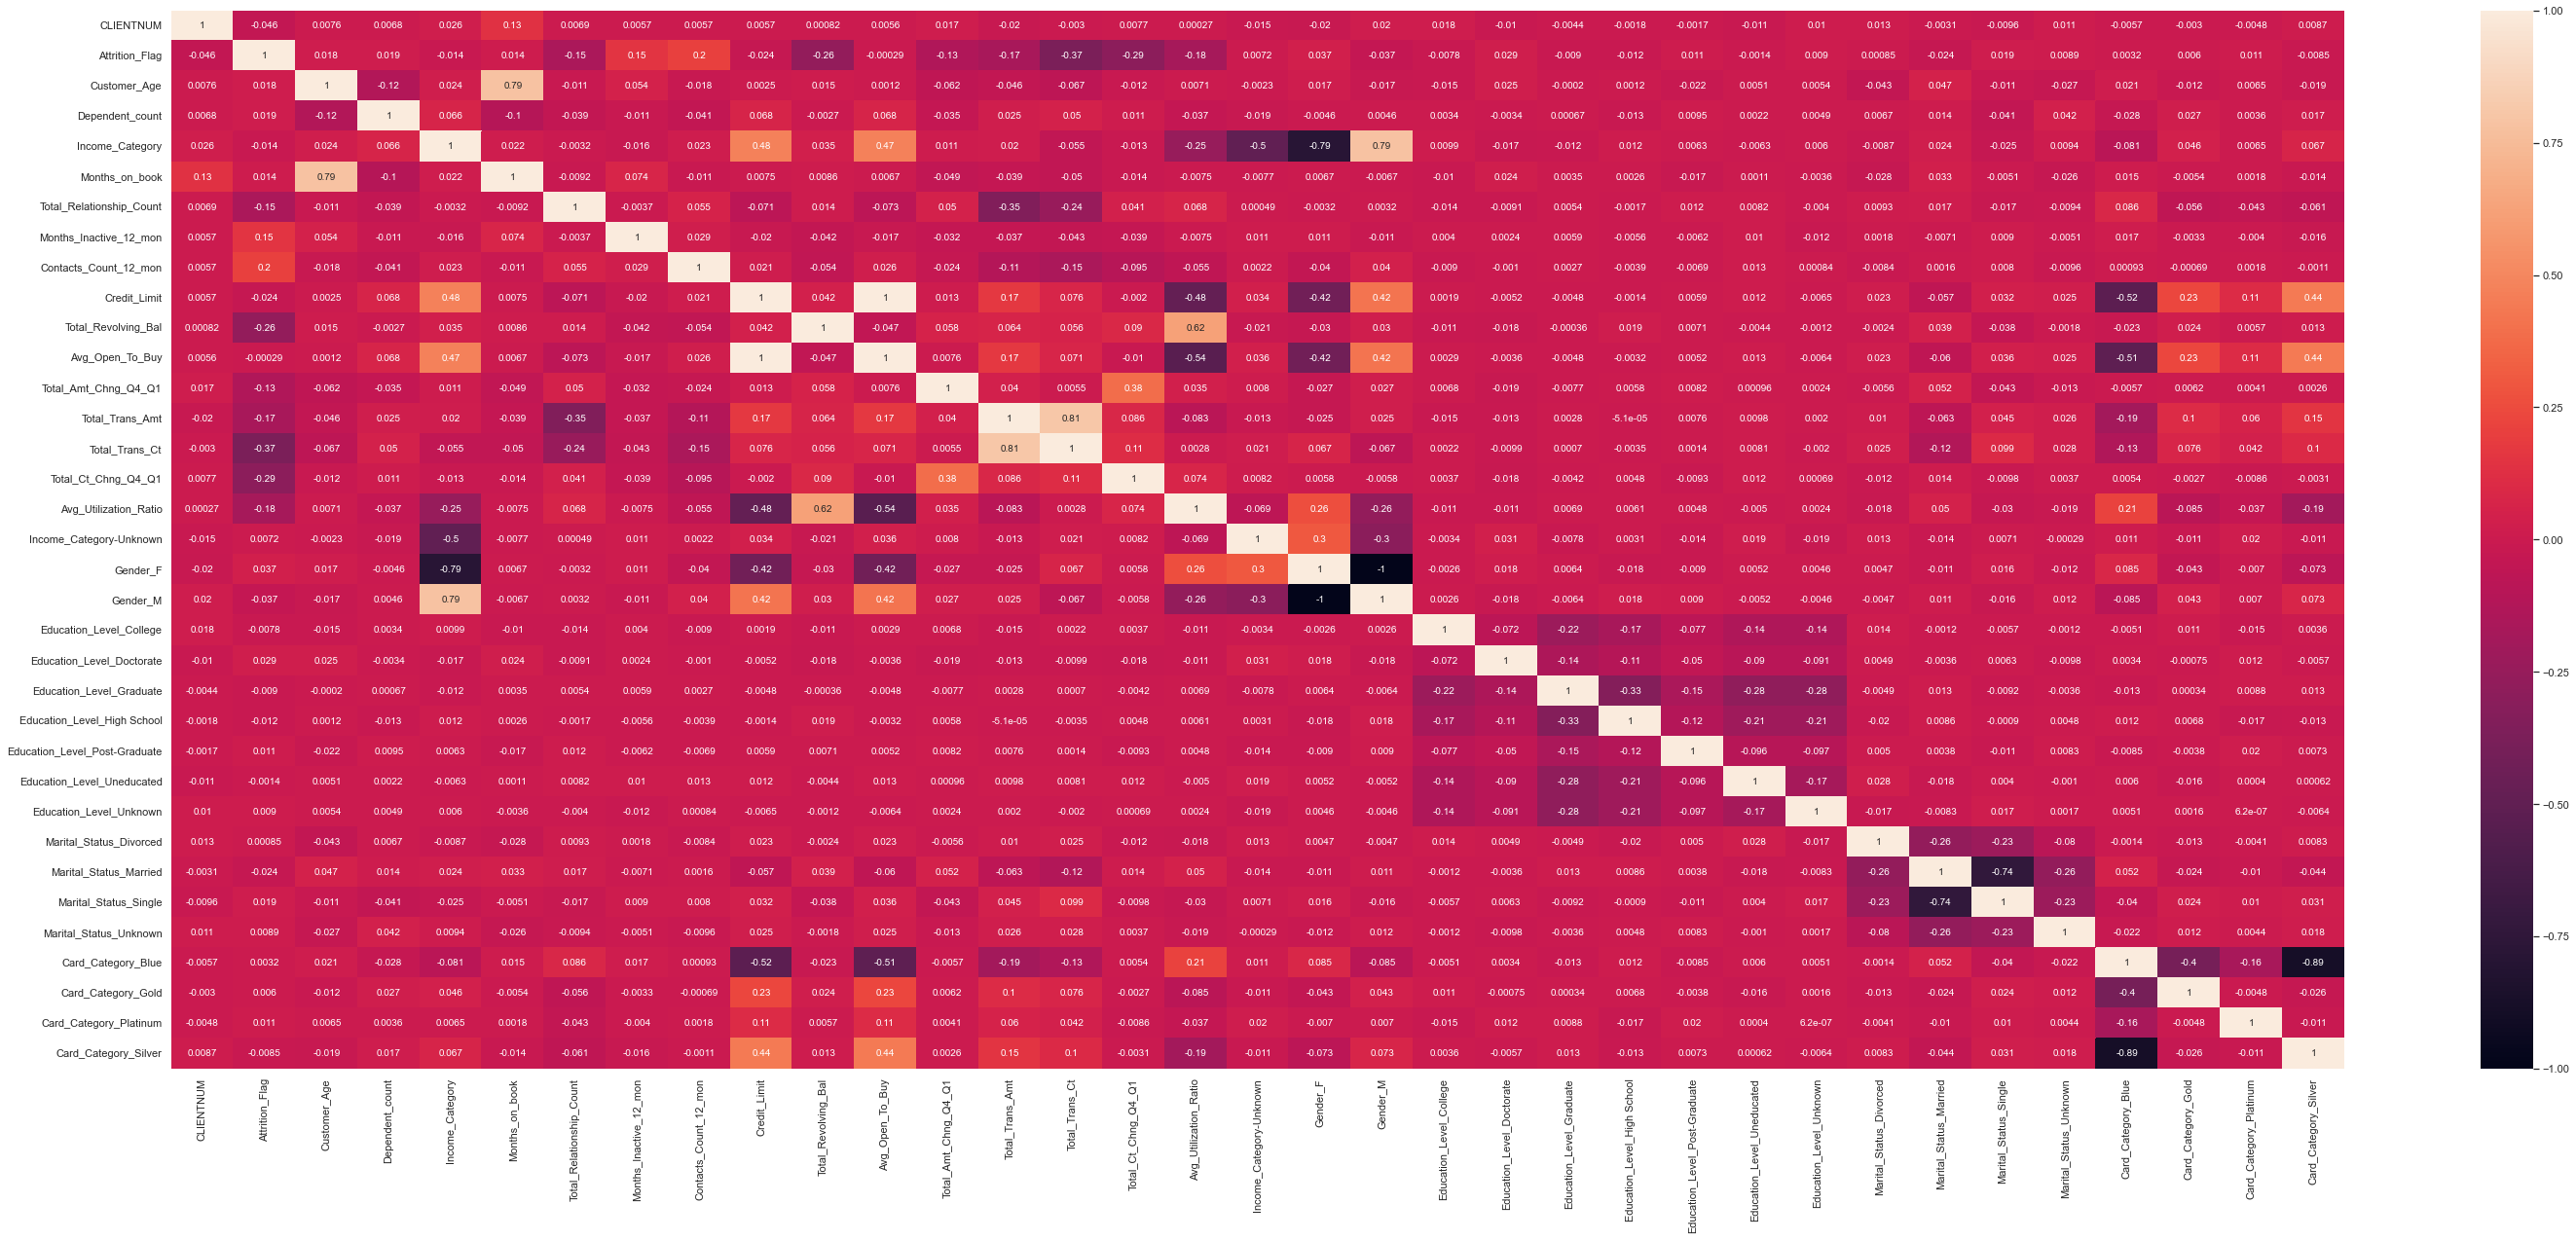

In [17]:
# Calculating the correlation matrix
corr = data.corr()
# Generating a heatmap
plt.figure(figsize=(50,20))
ax = sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True,)

#ensure that top and bottom rows aren't cut off
b, t = plt.ylim() # discover the values for bottom and top
#plt.ylim(b + 0.5, t - 0.5)

# Random Forest Tree

### Train Test Split

In [18]:
df_X = data.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = data.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [19]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(10127, 32)
(10127,)
(7088, 32)
(7088,)
(3039, 32)
(3039,)


### Random Forest

In [20]:
# Create a Classifier object
rf1 = RandomForestClassifier(n_estimators = 100,
                             max_depth = 4) 
rf1.fit(X_train, y_train)                   

RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.906461625282167

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8989799276077657

                   precision    recall  f1-score   support

Existing Customer       0.90      0.99      0.94      2556
Attrited Customer       0.94      0.39      0.55       483

         accuracy                           0.90      3039
        macro avg       0.92      0.69      0.75      3039
     weighted avg       0.90      0.90      0.88      3039



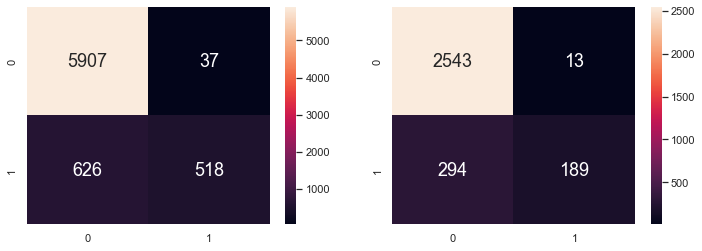

In [21]:
# Predict Legendary values corresponding to Total
y_train_pred = rf1.predict(X_train)
y_test_pred = rf1.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf1.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf1.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

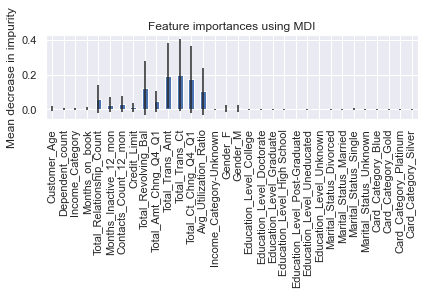

In [22]:
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

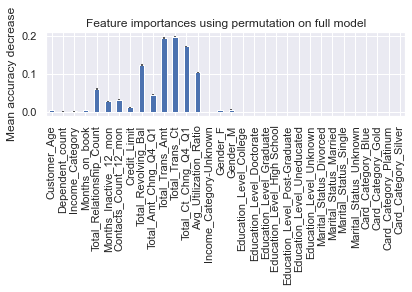

In [23]:
result = permutation_importance(
    rf1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

In [24]:
# Use GridSearch to find the best combination of model hyperparameters

rf = RandomForestClassifier(max_depth = 2)

param_grid = { "n_estimators" : [10,100,1000,10000],  
              'max_depth' : [2,3,4,5,6,7,8]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

best_param = gs.best_params_


0.9373614464551807
{'max_depth': 8, 'n_estimators': 1000}


In [28]:
rf2 = RandomForestClassifier(n_estimators = best_param['n_estimators'], 
                             max_depth = best_param['max_depth'])
#fitting the parameters into the Decision Tree
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9585214446952596

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9325435998683778

                   precision    recall  f1-score   support

Existing Customer       0.93      0.99      0.96      2556
Attrited Customer       0.92      0.63      0.75       483

         accuracy                           0.93      3039
        macro avg       0.93      0.81      0.85      3039
     weighted avg       0.93      0.93      0.93      3039



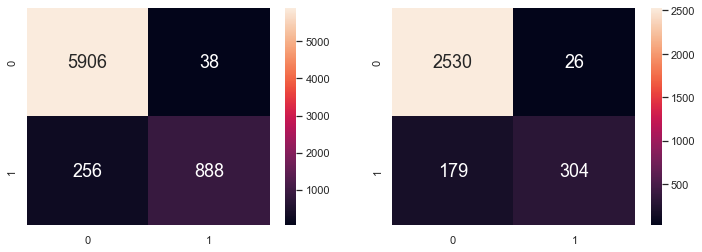

In [29]:
# Predict Legendary values corresponding to Total
y_train_pred = rf2.predict(X_train)
y_test_pred = rf2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

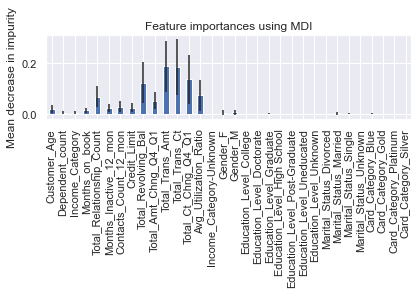

In [30]:
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

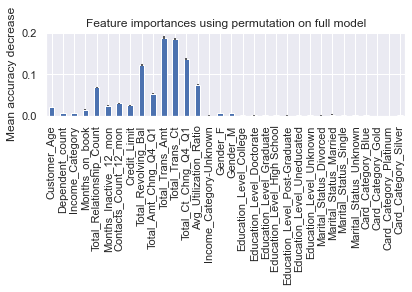

In [31]:
result = permutation_importance(
    rf2, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

# Decision Tree + Resampling Data
Noticing that the data is very skewed as only 1627 of the 10127 data was for "Attrited Customer" response, we decided to do resampling to balance the classes

### Resample Data

In [32]:
# Get different response sample
attrited_data = data[data.Attrition_Flag == 1]
existing_data = data[data.Attrition_Flag == 0]
 
# Upsample the Bad samples
attrited_data_up = resample(attrited_data, 
                            replace=True,                       # sample with replacement
                            n_samples=existing_data.shape[0])   # to match number of existing
 
# Combine the two classes back after upsampling
data_up = pd.concat([existing_data, attrited_data_up])
 
# Check the ratio of the classes
data_up['Attrition_Flag'].value_counts()

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

### Train Test Split

In [33]:
df_X = data_up.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = data_up.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [34]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(17000, 32)
(17000,)
(11900, 32)
(11900,)
(5100, 32)
(5100,)


### Random Forest

In [35]:
# Create a Decision Tree Classifier object
rf1 = RandomForestClassifier(n_estimators = 100,
                             max_depth = 4) 
rf1.fit(X_train, y_train)                   

RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8917647058823529

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8768627450980392

                   precision    recall  f1-score   support

Existing Customer       0.88      0.86      0.87      2482
Attrited Customer       0.87      0.89      0.88      2618

         accuracy                           0.88      5100
        macro avg       0.88      0.88      0.88      5100
     weighted avg       0.88      0.88      0.88      5100



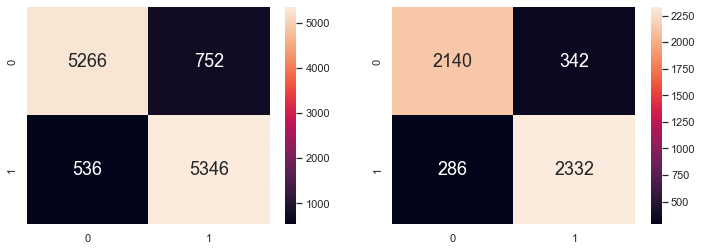

In [36]:
# Predict Legendary values corresponding to Total
y_train_pred = rf1.predict(X_train)
y_test_pred = rf1.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf1.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf1.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

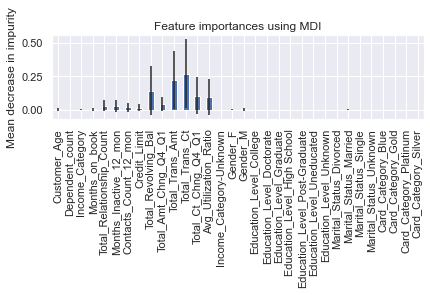

In [37]:
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

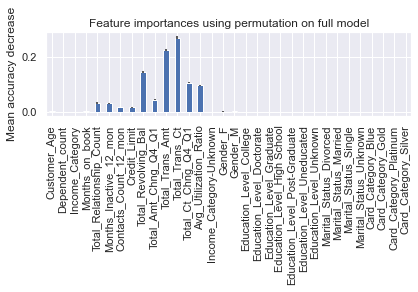

In [38]:
result = permutation_importance(
    rf1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

In [39]:
# Use GridSearch to find the best combination of model hyperparameters

rf = RandomForestClassifier(max_depth = 2)

param_grid = { "n_estimators" : [10,100,1000,10000],  
              'max_depth' : [2,3,4,5,6,7,8]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

best_param = gs.best_params_


0.9547899159663865
{'max_depth': 8, 'n_estimators': 1000}


In [40]:
rf2 = RandomForestClassifier(n_estimators = best_param['n_estimators'], 
                             max_depth = best_param['max_depth'])
#fitting the parameters into the Decision Tree
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9661344537815126

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9529411764705882

                   precision    recall  f1-score   support

Existing Customer       0.96      0.94      0.95      2482
Attrited Customer       0.94      0.97      0.95      2618

         accuracy                           0.95      5100
        macro avg       0.95      0.95      0.95      5100
     weighted avg       0.95      0.95      0.95      5100



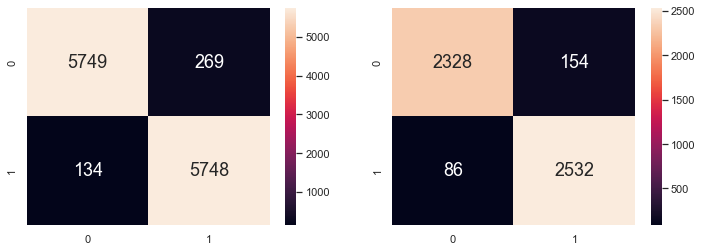

In [41]:
# Predict Legendary values corresponding to Total
y_train_pred = rf2.predict(X_train)
y_test_pred = rf2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

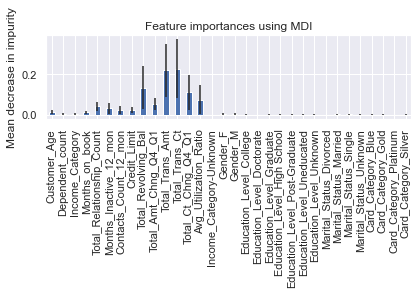

In [42]:
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

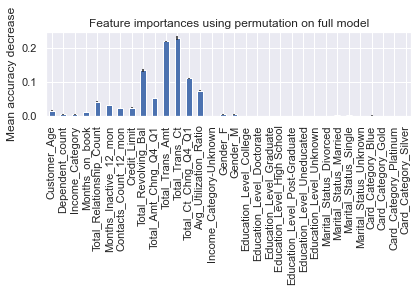

In [43]:
result = permutation_importance(
    rf2, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()